
Statistics for Calories and Duration:
          Calories    Duration
count   169.000000  169.000000
mean    375.790244   63.846154
std     262.385991   42.299949
min      50.300000   15.000000
25%     253.300000   45.000000
50%     321.000000   60.000000
75%     384.000000   60.000000
max    1860.400000  300.000000

Aggregreted Data:
          Calories    Duration
min      50.300000   15.000000
max    1860.400000  300.000000
count   169.000000  169.000000
mean    375.790244   63.846154


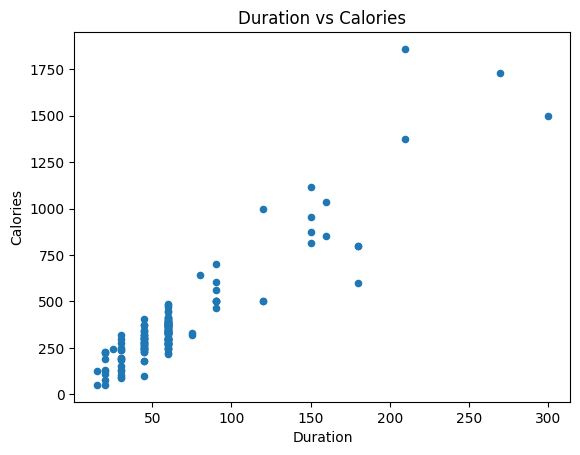

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('/content/data.csv')

# Fill missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Display basic statistics of 'Calories' and 'Duration'
print("\nStatistics for Calories and Duration:")
print(df[['Calories', 'Duration']].describe())
agg_columns = ['Calories', 'Duration']
agg_result = df[agg_columns].agg(['min','max','count','mean'])
print("\nAggregreted Data:")
print(agg_result)
# Filter rows where 'Calories' is between 500 and 1000
filtered_df = df[(df['Calories'] >= 500) & (df['Calories'] <= 1000)]

# Filter rows where 'Calories' is >= 500 and 'Pulse' is less than 100
filtered_pulse_df = df[(df['Calories'] >= 500) & (df['Pulse'] < 100)]

# Drop the 'Maxpulse' column as it's not needed
df.drop(columns=['Maxpulse'], inplace=True)

# Convert 'Calories' to integers
df['Calories'] = df['Calories'].astype(int)

# Create and display a scatter plot of 'Duration' vs 'Calories'
df.plot.scatter(x='Duration', y='Calories', title='Duration vs Calories')
plt.show()


The code loads data from a CSV file into a Pandas DataFrame, fills missing values with the mean of each column, and displays basic statistics for the 'Calories' and 'Duration' columns. It then filters the data based on specific conditions and drops the unnecessary 'Maxpulse' column. The 'Calories' column is converted to integers. Finally, a scatter plot is created to visualize the relationship between 'Duration' and 'Calories', with the plot displayed at the end.



Train MSE: 29793161.082422983, Test MSE: 35301898.887134895


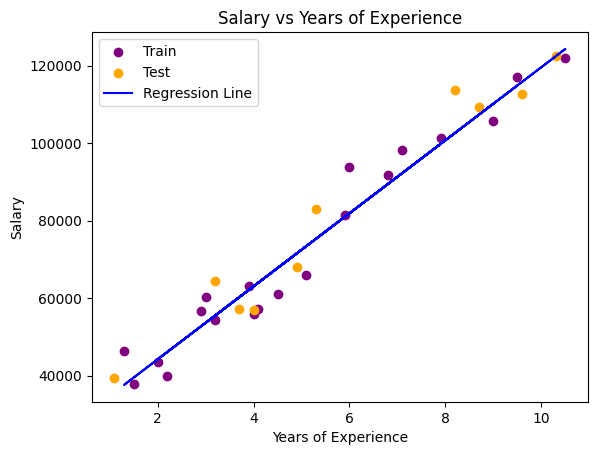

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/Salary_Data (2).csv')

# Prepare features and target variable
X = df[['YearsExperience']]
y = df['Salary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Train the model
model = LinearRegression().fit(X_train, y_train)

# Predict and calculate MSE
y_train_pred, y_test_pred = model.predict(X_train), model.predict(X_test)
mse_train, mse_test = mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)

# Display results
print(f"Train MSE: {mse_train}, Test MSE: {mse_test}")

# Plot data and regression line
plt.scatter(X_train, y_train, color='purple', label='Train')
plt.scatter(X_test, y_test, color='orange', label='Test')
plt.plot(X_train, y_train_pred, color='blue', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')
plt.legend()
plt.show()


The code loads data from a CSV file, where 'YearsExperience' is the feature and 'Salary' is the target variable. It splits the data into training (67%) and testing (33%) sets using train_test_split. A linear regression model is trained on the training data and used to predict salaries for both training and testing sets. The Mean Squared Error (MSE) is calculated to evaluate the model's performance. A scatter plot is created to visualize the training and testing data points along with the regression line, showing the relationship between years of experience and salary.